# Maths Lab - 8

## Teammates:
#### Akshita Potdar - 702768460
#### Kalyani Khandait - 702768391
#### Logesh Gangadharan - 702723890


## Problem -1



Generate an artificial 2-dimensional dataset X containing two
separated clusters of points. Create an associated vector y
with entries +1 and −1 indicating into which cluster each
point belongs.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC


np.random.seed(0)

mean1 = [4, 4]
mean2 = [-4, -4]
cov = [[1, 0], [0, 1]]

X1 = np.random.multivariate_normal(mean1, cov, 57)
X2 = np.random.multivariate_normal(mean2, cov, 57)
X = np.vstack((X1, X2))
y = np.hstack((np.ones(57), -np.ones(57)))


In [ ]:
# svm model
svm = SVC(kernel='linear')
svm.fit(X, y)


SVC(kernel='linear')

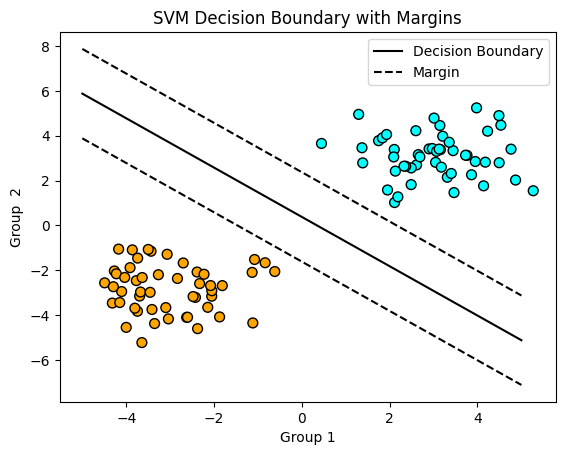

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC


np.random.seed(0)
mean1, mean2 = [3, 3], [-3, -3]
cov = [[1, 0], [0, 1]]              # Identity covariance

X1 = np.random.multivariate_normal(mean1, cov, 50)
X2 = np.random.multivariate_normal(mean2, cov, 50)
X = np.vstack((X1, X2))
y = np.hstack((np.ones(50), -np.ones(50)))

# Train SVM model
svm = SVC(kernel='linear')
svm.fit(X, y)

# Plotting
colors = np.where(y == 1, 'cyan', 'orange')
plt.scatter(X[:, 0], X[:, 1], color=colors, edgecolor='k', s=50)


w = svm.coef_[0]
b = svm.intercept_[0]


x_plot = np.linspace(-5, 5, 100)

#  decision boundary and margins
y_plot = - (w[0] * x_plot + b) / w[1]
margin = 1 / np.sqrt(np.sum(w ** 2))
y_margin_upper = y_plot + margin
y_margin_lower = y_plot - margin

# decision boundary and margins
plt.plot(x_plot, y_plot, 'k-', label='Decision Boundary')
plt.plot(x_plot, y_margin_upper, 'k--', label='Margin')
plt.plot(x_plot, y_margin_lower, 'k--')
plt.legend()
plt.xlabel('Group 1')
plt.ylabel('Group  2')
plt.title('SVM Decision Boundary with Margins')
plt.show()


## Problem -2


In this problem, you will train a support vector machine classifier to
predict the handwritten digits in the zipcode dataset

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score

train_data = pd.read_csv("/content/zip.train", header=None, sep = '\s+')
test_data = pd.read_csv("/content/zip.test", header=None, sep = '\s+')

X_train, y_train = train_data.iloc[:, 1:], train_data.iloc[:, 0]
X_test, y_test = test_data.iloc[:, 1:], test_data.iloc[:, 0]

param_grid = {'C': [0.01, 10, 10, 1000]}
svc = SVC(kernel='linear')

stratified_cv = StratifiedKFold(n_splits=3)
grid_search = GridSearchCV(svc, param_grid, cv=stratified_cv, scoring='accuracy')
grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_
print(f"Best C parameter: {grid_search.best_params_['C']}")

y_pred = best_model.predict(X_test)
T_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy: {T_accuracy * 100:.6f}%")


FileNotFoundError: [Errno 2] No such file or directory: '/content/zip.train'